In [181]:
#CHECK GRAFICI LATEX e aumenta N

### Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

In [175]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

plt.rc('text', usetex=False)  # Abilita l'uso di LaTeX in tutte le stringhe di testo
plt.rc('font', family='serif') 

In [172]:
mu = 1
sigma = 0.2
N = 5

data = np.random.normal(mu, sigma, N)
x = np.linspace(0, 2, 1000)

prod = np.ones(len(x))
som_log = np.zeros(len(x))

In [173]:
plt.figure(figsize=(10, 6))

for d in data:
    dist = norm(d, sigma)
    plt.plot(x, dist.pdf(x), label=f'Individual Likelihood: μ={d:.2f}, σ={sigma:.2f}')
    prod *= dist.pdf(x)
    som_log += np.log(dist.pdf(x))

mean = np.mean(data)
print('Max Likelihood:', x[np.argmax(prod)])
print('Max Log-Likelihood:', x[np.argmax(som_log)])
print('Mean of Data:', mean)

plt.plot(x, prod, color='black', label=r'$\text{Prodotto delle Verosimiglianze}$')
plt.axvline(x[np.argmax(prod)], color='red', linestyle='--', label=rf'$\text{{Massima Verosimiglianza}}: {x[np.argmax(prod)]:.2f}$')
plt.title(r'$\text{Verosimiglianze e Massima Verosimiglianza}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\text{Densità di Probabilità}$')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(x, som_log, label=r'$\text{Somma dei Log-Verosimiglianze}$')
plt.axvline(x[np.argmax(som_log)], color='red', linestyle='--', label=rf'$\text{{Massimo Log-Verosimiglianza}}: {x[np.argmax(som_log)]:.2f}$')
plt.title(r'$\text{Log-Verosimiglianza e Massima Log-Verosimiglianza}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\text{Densità di Probabilità Logaritmica}$')
plt.legend()
plt.grid()
plt.show()


Max Likelihood: 1.007007007007007
Max Log-Likelihood: 1.007007007007007
Mean of Data: 1.0061820295085604


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1000x600 with 1 Axes>

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1000x600 with 1 Axes>

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above

In [167]:
F = -np.diff(som_log, n=2) / (x[1] - x[0]) ** 2
sigma_F = np.sqrt(1 / F)

mean_err = sigma / np.sqrt(N)

print('Fisher Information Error:', sigma_F[np.argmax(prod)])
print('Error of the Mean:', mean_err)

Fisher Information Error: 0.08944271909994266
Error of the Mean: 0.08944271909999159


- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

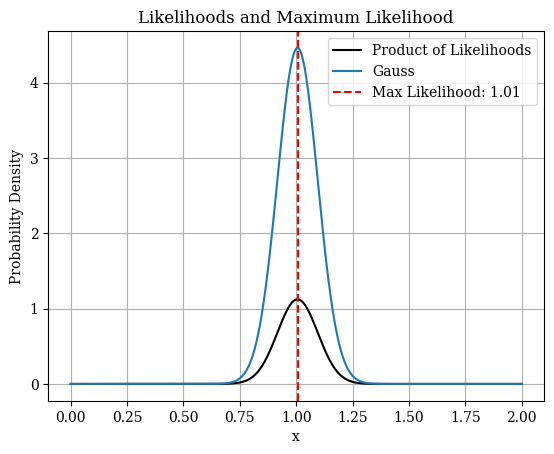

In [179]:
plt.plot(x, prod, color='black', label='Product of Likelihoods')
plt.plot(x, norm(mean, mean_err).pdf(x), label='Gauss') #divide for 4. and see that it's exaclty the same
plt.axvline(x[np.argmax(prod)], color='red', linestyle='--', label=f'Max Likelihood: {x[np.argmax(prod)]:.2f}')
plt.title('Likelihoods and Maximum Likelihood')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()


### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

In [160]:
N = 5
mu = 1
mu_err = 0.2
sigma_err = 0.05
x = np.linspace(0, 2, 1000)

sigma = np.abs(np.random.normal(mu_err, sigma_err, N))
data = np.array([np.random.normal(mu, s, 1) for s in sigma])

prod = np.ones(len(x))
som_log = np.zeros(len(x))

Max Likelihood: 1.005005005005005
Max Log-Likelihood: 1.005005005005005
Weighted Mean: 1.0053247264595553


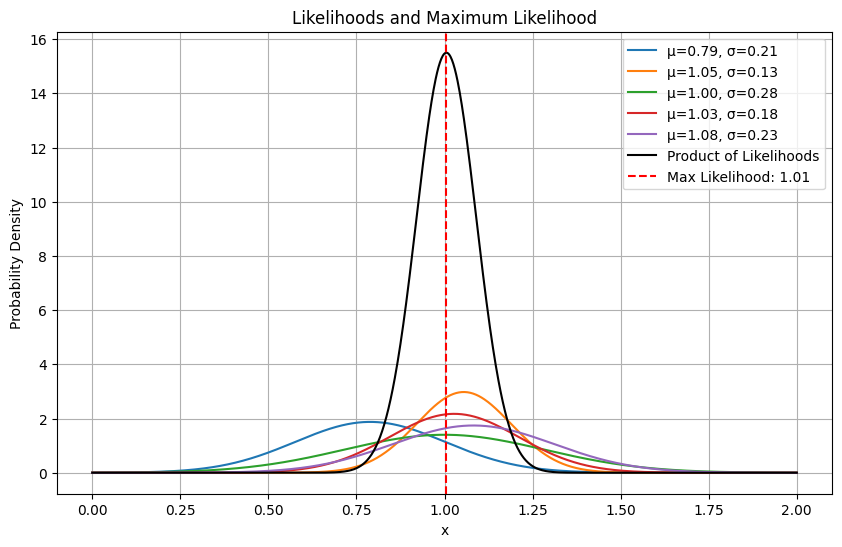

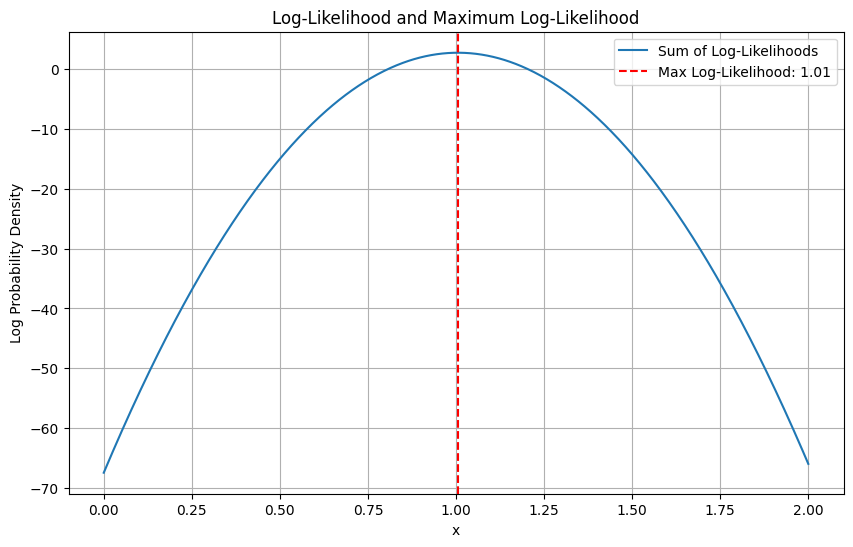

In [161]:
plt.figure(figsize=(10, 6))

for d, s in zip(data, sigma):
    dist = norm(d, s)
    plt.plot(x, dist.pdf(x), label=f'μ={d[0]:.2f}, σ={s:.2f}')
    prod *= dist.pdf(x)
    som_log += np.log(dist.pdf(x))

mean = np.average(data, weights=1 / sigma ** 2, axis=0)
max_l = x[np.argmax(prod)]
max_ll = x[np.argmax(som_log)]

print('Max Likelihood:', max_l)
print('Max Log-Likelihood:', max_ll)
print('Weighted Mean:', mean[0])

plt.plot(x, prod, color='black', label='Product of Likelihoods')
plt.axvline(x[np.argmax(prod)], color='red', linestyle='--', label=f'Max Likelihood: {x[np.argmax(prod)]:.2f}')
plt.title('Likelihoods and Maximum Likelihood')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))

# Plot della somma dei log-likelihood
plt.plot(x, som_log, label='Sum of Log-Likelihoods')
plt.axvline(x[np.argmax(som_log)], color='red', linestyle='--', label=f'Max Log-Likelihood: {x[np.argmax(som_log)]:.2f}')
plt.title('Log-Likelihood and Maximum Log-Likelihood')
plt.xlabel('x')
plt.ylabel('Log Probability Density')
plt.legend()
plt.grid()
plt.show()


In [162]:
F = -np.diff(som_log, n=2) / (x[1] - x[0]) ** 2
sigma_F = np.sqrt(1 / F)

print('Fisher Error:', sigma_F[np.argmax(prod)])

mean_error = np.sqrt(1 / np.sum(1 / sigma ** 2))
print('Error of the Mean:', mean_error)

Fisher Error: 0.08483688231226943
Error of the Mean: 0.08483688231224785
